# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды.

## Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
data_mkrf_movies = pd.read_csv(url)
data_mkrf_shows = pd.read_csv(url)

Для объединения данных нужно привести столбец `puNumber` к типу int, мешает одна строчка со значением "нет" удалим её.

In [3]:
data_mkrf_movies = data_mkrf_movies.drop(data_mkrf_movies.query('puNumber == "нет"').index)
data_mkrf_movies.puNumber = data_mkrf_movies.puNumber.astype('int64')

In [4]:
data_mkrf_movies = data_mkrf_movies.merge(data_mkrf_shows, how='left')

In [5]:
data_mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [6]:
data_mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
title                    7485 non-null object
puNumber                 7485 non-null int64
show_start_date          7485 non-null object
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.1+ KB


- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма;
- box_office — сборы в рублях.

### Вывод

- Для объединения данных изменили тип данных в столбеце puNumber на int, а строку со значением "нет" удалили.
- В 11 столбцах есть пропуски в данных

## Шаг 2. Предобработка данных

### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [7]:
data_mkrf_movies['show_start_date'] = pd.to_datetime(data_mkrf_movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
data_mkrf_movies['show_start_date'].head()

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

In [8]:
data_mkrf_movies.ratings = pd.to_numeric(data_mkrf_movies.ratings, errors='coerce')

### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [9]:
data_mkrf_movies.isna().sum() / data_mkrf_movies.shape[0]

title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.002405
production_country       0.000267
director                 0.001202
producer                 0.075885
age_restriction          0.000000
refundable_support       0.955645
nonrefundable_support    0.955645
budget                   0.955645
financing_source         0.955645
ratings                  0.132933
genres                   0.130261
box_office               0.578090
dtype: float64

В столбцах  `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` больше 95% данных пропуски, а в столбце `box_office` больше 57%.

Заменим пропуски в столбцах `film_studio`, `production_country`, `director`, `producer`, `age_restriction` и `genres` на значение "unknown"

In [10]:
data_mkrf_movies[['film_studio', 'production_country', 'director', 'producer', 'age_restriction',  'genres']] = \
data_mkrf_movies[['film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'genres']] \
.fillna('unknown')

In [11]:
data_mkrf_movies[~data_mkrf_movies.financing_source.isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,unknown,2.814000e+04
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN


Данные в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` связаны и находятся в одних и тех же строках, оставим пропуски чтобы не портить общую статистику по данным.

### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [12]:
data_mkrf_movies.duplicated().sum()

0

Дублей нет

In [13]:
data_mkrf_movies.puNumber.value_counts().head()

221054410    2
221154310    2
114001919    1
124001617    1
111005011    1
Name: puNumber, dtype: int64

In [14]:
data_mkrf_movies.query('(puNumber == 221054410) or (puNumber == 221154310)')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Есть два дубля по столбцу `puNumber`, но название фильмов разное, возможно они появились из-за опечаток. Так как они нам не мешают и в них есть нужная информация в столбцах `age_restriction` и `ratings`, оставим их.

In [15]:
data_mkrf_movies.title.value_counts()

День святого Валентина_                 5
Кошмар на улице Вязов /Фильм ужасов/    4
Красавчик-2                             4
Рапунцель: Запутанная история           4
Химера                                  4
                                       ..
Далеко на север                         1
Дед Мороз. Битва Магов                  1
Джон Уик 2                              1
Попугай Club                            1
Бэтмэн: Начало                          1
Name: title, Length: 6771, dtype: int64

In [16]:
data_mkrf_movies.query('title == "День святого Валентина_"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3901,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3990,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4069,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4195,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5069,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


Есть дубли по названию фильмов, дата выхода везде разная, скорее всего фильмы выходили не только в кинотеатрах, но и на разных платформах, если удалить эти дубли, то можем сломать статистику прибыльности по дате.

### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [17]:
data_mkrf_movies.type.value_counts()

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [18]:
data_mkrf_movies.type = data_mkrf_movies.type.str.strip()
data_mkrf_movies.type.value_counts()

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [19]:
data_mkrf_movies.production_country.value_counts().head(10)

США                     2172
Россия                  1820
СССР                     347
Франция                  301
Великобритания           257
Италия                   129
Германия                 110
США - Великобритания      88
Япония                    77
Испания                   74
Name: production_country, dtype: int64

In [20]:
data_mkrf_movies.production_country = data_mkrf_movies.production_country.apply(lambda x: [i.strip() for i in x.split('-')])

In [21]:
data_mkrf_movies.production_country.value_counts().head(10)

[США]                    2175
[Россия]                 1820
[СССР]                    377
[Франция]                 302
[Великобритания]          259
[Италия]                  131
[Германия]                110
[США, Великобритания]     104
[Япония]                   77
[Испания]                  74
Name: production_country, dtype: int64

После преобразования значений в список и удаления пробелов количество одинаковых значений в столбце `production_country` выросло.

In [22]:
data_mkrf_movies['director'].value_counts().head()

О.Семёнова          47
Д.Червяцов          17
Стивен Содерберг    17
Ридли Скотт         16
Тиль Швайгер        14
Name: director, dtype: int64

In [23]:
data_mkrf_movies['director'] = data_mkrf_movies['director'].apply(lambda x: [i.strip() for i in x.split(',')])

In [24]:
data_mkrf_movies['director'].value_counts().head()

[О.Семёнова]          60
[Стивен Содерберг]    17
[Д.Червяцов]          17
[Ридли Скотт]         16
[Тиль Швайгер]        14
Name: director, dtype: int64

In [25]:
data_mkrf_movies['genres'].value_counts().head()

unknown                    975
драма                      476
комедия                    352
мелодрама,комедия          222
драма,мелодрама,комедия    189
Name: genres, dtype: int64

После преобразования значений в список и удаления пробелов количество одинаковых значений в столбце `director` выросло.

In [26]:
data_mkrf_movies['genres'] = data_mkrf_movies['genres'].apply(lambda x: [i.strip() for i in x.split(',')])

In [27]:
data_mkrf_movies['genres'].value_counts().head()

[unknown]                      975
[драма]                        476
[комедия]                      352
[мелодрама, комедия]           222
[драма, мелодрама, комедия]    189
Name: genres, dtype: int64

После преобразования значений в список и удаления пробелов количество одинаковых значений в столбце `genres` неизменилось.

In [52]:
data_mkrf_movies.age_restriction = data_mkrf_movies.age_restriction.apply(lambda x: x.split()[0])

### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [28]:
data_mkrf_movies[~data_mkrf_movies['budget'].isna()][['refundable_support', 'nonrefundable_support', 'budget']] \
.query('refundable_support + nonrefundable_support > budget')

,refundable_support,nonrefundable_support,budget
2052,0.0,23000000.0,0.0
2057,0.0,75000000.0,0.0
2471,10000000.0,70000000.0,0.0
2531,20000000.0,0.0,0.0
2614,60000000.0,100000000.0,0.0
2683,0.0,59000000.0,0.0
2787,0.0,35000000.0,0.0
2873,0.0,6000000.0,0.0
3046,19000000.0,51000000.0,0.0
3564,0.0,250000000.0,0.0


Так как есть государственная поддержка, `budget` не может быть равен нулю, приравняем его к пропуску чтобы не учитывать в будущем.

In [29]:
data_mkrf_movies.budget = np.where(data_mkrf_movies.budget == 0, 
                                   np.nan,
                                   data_mkrf_movies.budget)

### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [30]:
data_mkrf_movies['year'] = data_mkrf_movies['show_start_date'].dt.year

In [31]:
data_mkrf_movies['year'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: year, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [32]:
data_mkrf_movies['chief_director'] = data_mkrf_movies['director'].apply(lambda x: x[0])

In [33]:
data_mkrf_movies['main_genre'] = data_mkrf_movies['genres'].apply(lambda x: x[0])

In [34]:
data_mkrf_movies[['chief_director', 'main_genre']].head()

,chief_director,main_genre
0,Кевин Костнер,боевик
1,Е.Матвеев,драма
2,Тимур Бекмамбетов,фантастика
3,Тимур Бекмамбетов,фантастика
4,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [35]:
data_mkrf_movies['share'] = (data_mkrf_movies.refundable_support +
                             data_mkrf_movies.nonrefundable_support) / data_mkrf_movies.budget

In [36]:
data_mkrf_movies[~data_mkrf_movies['budget'].isna()]['share']

1281    0.333703
1448    0.700000
1498    0.612691
1524    0.690095
1792    0.624764
          ...   
7463    0.510204
7465    0.526316
7473    0.529661
7475    0.649998
7477    0.666012
Name: share, Length: 315, dtype: float64

## Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

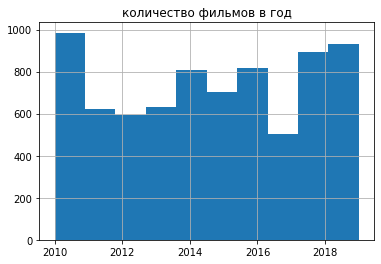

In [37]:
data_mkrf_movies.year.hist()
plt.title('количество фильмов в год')
plt.show()

Если данные о прокате в кинотеатрах это `box_office` то их доля

In [38]:
1 - (data_mkrf_movies.box_office.isna().sum() / data_mkrf_movies.shape[0])

0.4219104876419506

Доля проката в кинотеатрах составляет 42%, отсюда следует что некоторые фильмы могут снимать сразу для телевидения или стриминговых сервисов.

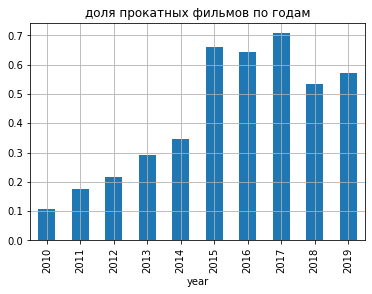

In [39]:
df = data_mkrf_movies.groupby('year').agg({'box_office':'count', 'title':'count'})
df['share'] = df.box_office / df.title
df.share.plot(kind='bar', grid=True)
plt.title('доля прокатных фильмов по годам')
plt.show()

Доля прокатных фильмов растет до 2017, а потом начинает падать.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

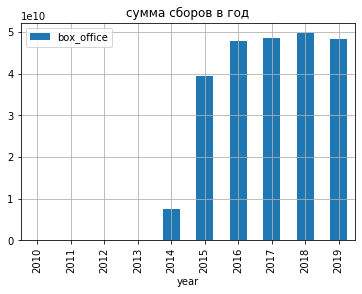

In [40]:
data_mkrf_movies.groupby('year').agg({'box_office': 'sum'}).plot(kind='bar', grid=True)
plt.title('сумма сборов в год')
plt.show()

- Данных по сборам в кинотеатрах практически нет до 2015 года, можно считать что данные до 2015 года недостоверны, возможно они не выгрузились из-за технической ошибки.
- Показатель растет начиная с 2015 года — это может говорить о том, что российский кинопрокат становится популярнее с каждым годом.

In [41]:
min_year = data_mkrf_movies.groupby('year').agg({'box_office': 'sum'}).min()[0]
max_year = data_mkrf_movies.groupby('year').agg({'box_office': 'sum'}).max()[0]

In [42]:
data_mkrf_movies.groupby('year').agg({'box_office': 'sum'}).query('box_office == @min_year or box_office == @max_year')

,box_office
year,
2010,2.428654e+06
2018,4.966840e+10


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [43]:
data_mkrf_movies.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

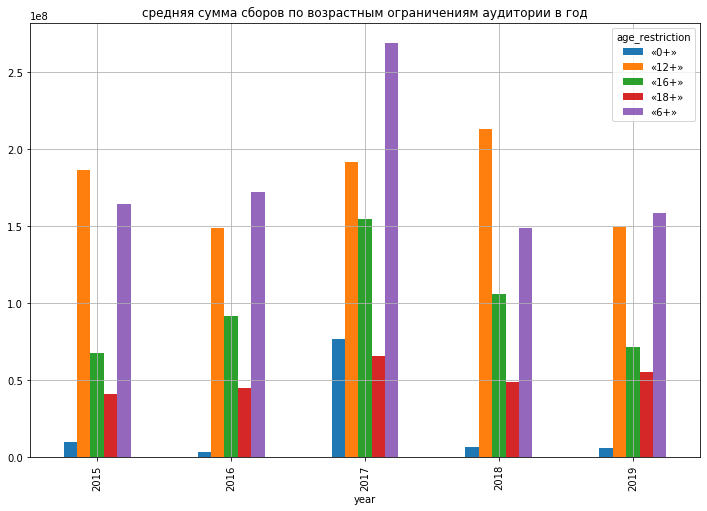

In [63]:
data_mkrf_movies.query('2019 >= year >= 2015') \
                .pivot_table(index=['year'], columns='age_restriction', values='box_office', aggfunc='mean') \
                .plot(kind='bar', grid=True, figsize=(12,8))
plt.title('средняя сумма сборов по возрастным ограничениям аудитории в год')
plt.show()

В 2017 году доля прокатынх фильмов была самой большой, а фильмы с возрастным ограничением «6+» заработали больше денег чем обычно.

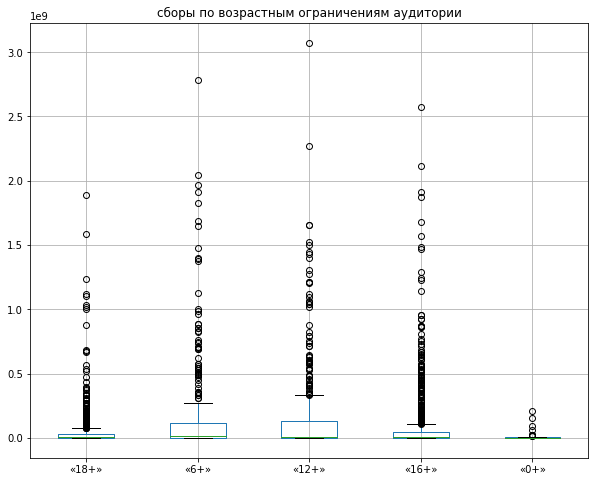

In [93]:
age_restriction = data_mkrf_movies.age_restriction.unique()
df = pd.DataFrame(data_mkrf_movies.title)
for i in age_restriction:
    df[i] = data_mkrf_movies.query('(2019 >= year >= 2015) and (age_restriction == @i)').box_office
plt.figure(figsize=(10,8))
df.drop('title', axis=1).boxplot()
plt.title('сборы по возрастным ограничениям аудитории')
plt.show()

В среднем, если убрать выбросы, больше всего сборов в прокате получают фильмы с возрастным ограничением «12+» и «6+».

In [78]:
data_mkrf_movies.query('(2019 >= year >= 2015) and (age_restriction == "«18+»")').ratings

0       7.2
2       6.8
3       6.8
4       6.8
8       8.0
       ... 
7457    8.0
7459    4.9
7471    3.9
7474    8.2
7478    NaN
Name: ratings, Length: 1086, dtype: float64

In [66]:
data_mkrf_movies.age_restriction.unique()

array(['«18+»', '«6+»', '«12+»', '«16+»', '«0+»'], dtype=object)

### Вывод

- Больше всего фильмов вышло в 2010, а меньше в 2017.
- Больше всего сборов было в 2018, а меньше в 2010.
- Возрастное ограничение аудитории влияет на сборы фильмов.
- В среднем, если убрать выбросы, больше всего сборов в прокате получают фильмы с возрастным ограничением «12+» и «6+».
- В 2017 году доля прокатынх фильмов была самой большой, а фильмы с возрастным ограничением «6+» заработали больше денег чем обычно.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

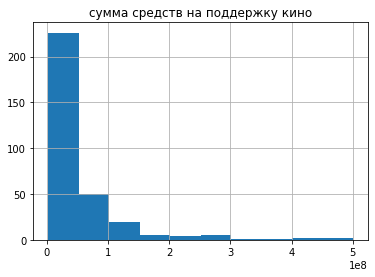

In [46]:
(data_mkrf_movies[~data_mkrf_movies['budget'].isna()]['refundable_support'] + 
 data_mkrf_movies[~data_mkrf_movies['budget'].isna()]['nonrefundable_support']).hist()
plt.title('сумма средств на поддержку кино')
plt.show()

Сумма государственной поддержки кино обычно не превышает 100000000.

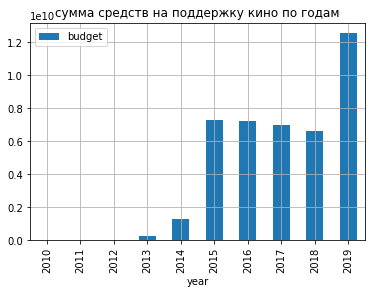

In [99]:
data_mkrf_movies.groupby('year').agg({'budget':'sum'}).plot(kind='bar', grid=True)
plt.title('сумма средств на поддержку кино по годам')
plt.show()

С 2015 года до 2018 года сумма средств на поддержку кино понемногу уменшалась, а в 2019 году выросла в почти два раза.

In [47]:
data_mkrf_movies['profit'] = data_mkrf_movies['box_office'] - data_mkrf_movies['budget']

In [48]:
data_mkrf_movies[~data_mkrf_movies['budget'].isna()][['budget', 'box_office', 'profit']]

,budget,box_office,profit
1281,79411900.0,3.653536e+05,-7.904655e+07
1448,37142857.0,2.814000e+04,-3.711472e+07
1498,176023490.0,1.995703e+07,-1.560665e+08
1524,40574140.0,5.591750e+04,-4.051822e+07
1792,40015122.0,2.321000e+05,-3.978302e+07
...,...,...,...
7463,980000000.0,7.177032e+08,-2.622968e+08
7465,190000000.0,5.010692e+08,3.110692e+08
7473,944000000.0,NaN,NaN
7475,46154000.0,NaN,NaN


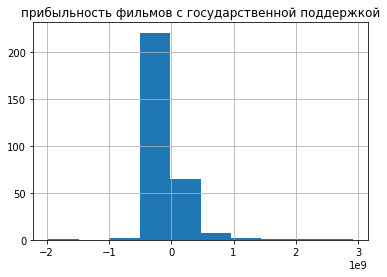

In [49]:
data_mkrf_movies[~data_mkrf_movies['budget'].isna()].profit.hist()
plt.title('прибыльность фильмов с государственной поддержкой')
plt.show()

In [111]:
(sum(data_mkrf_movies[~data_mkrf_movies['budget'].isna()].profit < 0) / 
 len(data_mkrf_movies[~data_mkrf_movies['budget'].isna()].profit))

0.746031746031746

Доля неокупившихся фильмов с государственной поддержкой равна 74%.

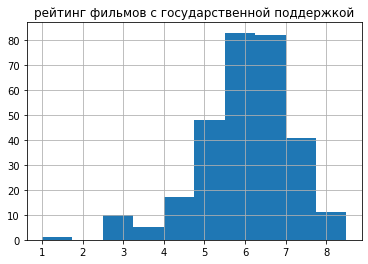

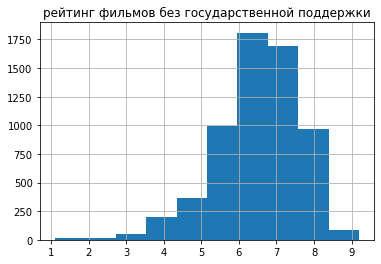

In [50]:
data_mkrf_movies[~data_mkrf_movies['budget'].isna()].ratings.hist()
plt.title('рейтинг фильмов с государственной поддержкой')
plt.show()
data_mkrf_movies[data_mkrf_movies['budget'].isna()].ratings.hist()
plt.title('рейтинг фильмов без государственной поддержки')
plt.show()

Рейтинг фильмов без государственной поддержки выше чем фильмов с поддержкой.

In [51]:
df = pd.DataFrame([data_mkrf_movies[data_mkrf_movies['budget'].isna()].ratings.agg(['mean', 'median']), 
                   data_mkrf_movies[~data_mkrf_movies['budget'].isna()].ratings.agg(['mean', 'median'])]).T
df.columns = ['без поддержки', 'с поддержкой']
df

,без поддержки,с поддержкой
mean,6.501567,6.015436
median,6.600000,6.200000


### Шаг 5. Напишите общий вывод

- Больше всего фильмов вышло в 2010, а меньше в 2017.
- Больше всего сборов было в 2018, а меньше в 2010.
- Возрастное ограничение аудитории влияет на сборы фильмов.
- Больше всего сборов собрали фильмы с возрастным ограничением аудитории «16+».
- В 2015 году фильмы «12+» заработали больше чем «16+», но количество фильмов «16+» в этом году больше, возможно это из-за того что информация о сборах в этом году неполная.
- Сумма государственной поддержки кино обычно не превышает 100000000.
- С 2015 года до 2018 года сумма средств на поддержку кино понемногу уменшалась, а в 2019 году выросла в почти два раза.
- Фильмы с государственной поддержкой в большенстве случаях неокупаются.
- Доля неокупившихся фильмов с государственной поддержкой равна 74%.
- Рейтинг фильмов с государственной поддержкой в большенстве случаях от 5 до 7.
- Рейтинг фильмов без государственной поддержки в среднем на полбалла выше чем с поддержкой.